# Cactus Identification
## A slightly different approach

In [1]:
import pandas as pd
import keras
import os
import glob
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf



Using TensorFlow backend.


In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        vertical_flip=True,
        horizontal_flip=True)

validate_datagen = ImageDataGenerator(rescale=1./255.,
                                  vertical_flip = True,
                                  horizontal_flip = True)

test_generator = ImageDataGenerator(1./255.)

In [3]:
ls

cactus-identification-p1.ipynb  model_2.h5              test/
cactus_Id_2.ipynb               model_Best.h5           train/
model.h5                        self_split_data/        train.csv
model_1.h5                      tensorflow_dockerfile/  train_2/


In [5]:
train_generator = train_datagen.flow_from_directory(
        './self_split_data/sorted_training',
        target_size=(32,32),
        batch_size=32,
        class_mode='binary')

validation_generator = validate_datagen.flow_from_directory(
        './self_split_data/validation',
        target_size=(32, 32),
        batch_size=32,
        class_mode='binary')

test_generator = test_generator.flow_from_directory(
        './self_split_data/test_sorted',
        target_size=(32,32),
        batch_size=32,
        shuffle=False,
        class_mode='binary')



Found 12528 images belonging to 2 classes.
Found 3500 images belonging to 2 classes.
Found 1472 images belonging to 2 classes.


In [6]:
model = keras.models.Sequential()

layer1 = Conv2D(32, (3, 3),activation='relu', padding='same',
                 input_shape=(32,32,3))
layer2 = Conv2D(32, (3, 3), activation='relu')

layer3 = Conv2D(64, (3, 3), activation='relu', padding='same')

layer4 = Conv2D(64, (3, 3), activation='relu')

model.add(layer1)
model.add(layer2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layer3)
model.add(layer4)
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxP

In [7]:
steps_per = 12528 // 32
val_steps = 3500 // 32

history = model.fit_generator(generator=train_generator, 
                    steps_per_epoch=steps_per, 
                    validation_data=validation_generator,
                    validation_steps=val_steps,
                    epochs=25)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
391/391 [==============================] - 117s 298ms/step - loss: 0.2338 - acc: 0.9025 - val_loss: 0.0966 - val_acc: 0.9610
Epoch 2/25
391/391 [==============================] - 9s 24ms/step - loss: 0.1144 - acc: 0.9620 - val_loss: 0.1885 - val_acc: 0.9224
Epoch 3/25
391/391 [==============================] - 9s 24ms/step - loss: 0.0950 - acc: 0.9680 - val_loss: 0.0809 - val_acc: 0.9680
Epoch 4/25
391/391 [==============================] - 9s 24ms/step - loss: 0.0719 - acc: 0.9752 - val_loss: 0.0538 - val_acc: 0.9853
Epoch 5/25
391/391 [==============================] - 9s 24ms/step - loss: 0.0684 - acc: 0.9783 - val_loss: 0.0464 - val_acc: 0.9839
Epoch 6/25
391/391 [==============================] - 9s 24ms/step - loss: 0.0656 - acc: 0.9797 - val_loss: 0.0983 - val_acc: 0.9686
Epoch 7/25
391/391 [==============================] - 9s 24ms/step - loss: 0.0688 - acc: 0.9812 - val_loss: 0.0308 - val_acc: 0.9902
Epoch 8/25
391/391

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def plot_loss_acc(history, eps):
    history_dict = history.history
    epochs = range(1, eps + 1)
    __plot_loss(history_dict, epochs)
    __plot_acc(history_dict, epochs)

def __plot_loss(history_dict, epochs):
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

   
    plt.plot(epochs, loss_values, 'g', label='Training Loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

def __plot_acc(history_dict, epochs):
    plt.clf()

    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']

    plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
    plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

def prin_report(y_test, y_pred_test):
    print(classification_report(y_test, y_pred_test))
    
def prin_accs(history):
    print("training accuracy: {}".format(history.history['acc'][-1]))
    print("validation accuracy: {}".format(history.history['val_acc'][-1]))
    print("loss: {}".format(history.history['loss'][-1]))
    print("validation loss: {}".format(history.history['val_loss'][-1]))
    

In [9]:
import time
import numpy as np
from PIL import Image as pil_image
from keras.preprocessing.image import save_img
from keras import layers
from keras.applications import vgg16
from keras import backend as K


def normalize(x):
    """utility function to normalize a tensor.

    # Arguments
        x: An input tensor.

    # Returns
        The normalized input tensor.
    """
    return x / (K.sqrt(K.mean(K.square(x))) + K.epsilon())


def deprocess_image(x):
    """utility function to convert a float array into a valid uint8 image.

    # Arguments
        x: A numpy-array representing the generated image.

    # Returns
        A processed numpy-array, which could be used in e.g. imshow.
    """
    # normalize tensor: center on 0., ensure std is 0.25
    x -= x.mean()
    x /= (x.std() + K.epsilon())
    x *= 0.25

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x


def process_image(x, former):
    """utility function to convert a valid uint8 image back into a float array.
       Reverses `deprocess_image`.

    # Arguments
        x: A numpy-array, which could be used in e.g. imshow.
        former: The former numpy-array.
                Need to determine the former mean and variance.

    # Returns
        A processed numpy-array representing the generated image.
    """
    if K.image_data_format() == 'channels_first':
        x = x.transpose((2, 0, 1))
    return (x / 255 - 0.5) * 4 * former.std() + former.mean()


def visualize_layer(model,
                    layer_name,
                    step=1.,
                    epochs=15,
                    upscaling_steps=9,
                    upscaling_factor=1.2,
                    output_dim=(412, 412),
                    filter_range=(0, None)):
    """Visualizes the most relevant filters of one conv-layer in a certain model.

    # Arguments
        model: The model containing layer_name.
        layer_name: The name of the layer to be visualized.
                    Has to be a part of model.
        step: step size for gradient ascent.
        epochs: Number of iterations for gradient ascent.
        upscaling_steps: Number of upscaling steps.
                         Starting image is in this case (80, 80).
        upscaling_factor: Factor to which to slowly upgrade
                          the image towards output_dim.
        output_dim: [img_width, img_height] The output image dimensions.
        filter_range: Tupel[lower, upper]
                      Determines the to be computed filter numbers.
                      If the second value is `None`,
                      the last filter will be inferred as the upper boundary.
    """

    def _generate_filter_image(input_img,
                               layer_output,
                               filter_index):
        """Generates image for one particular filter.

        # Arguments
            input_img: The input-image Tensor.
            layer_output: The output-image Tensor.
            filter_index: The to be processed filter number.
                          Assumed to be valid.

        #Returns
            Either None if no image could be generated.
            or a tuple of the image (array) itself and the last loss.
        """
        s_time = time.time()

        # we build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        if K.image_data_format() == 'channels_first':
            loss = K.mean(layer_output[:, filter_index, :, :])
        else:
            loss = K.mean(layer_output[:, :, :, filter_index])

        # we compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, input_img)[0]

        # normalization trick: we normalize the gradient
        grads = normalize(grads)

        # this function returns the loss and grads given the input picture
        iterate = K.function([input_img], [loss, grads])

        # we start from a gray image with some random noise
        intermediate_dim = tuple(
            int(x / (upscaling_factor ** upscaling_steps)) for x in output_dim)
        if K.image_data_format() == 'channels_first':
            input_img_data = np.random.random(
                (1, 3, intermediate_dim[0], intermediate_dim[1]))
        else:
            input_img_data = np.random.random(
                (1, intermediate_dim[0], intermediate_dim[1], 3))
        input_img_data = (input_img_data - 0.5) * 20 + 128

        # Slowly upscaling towards the original size prevents
        # a dominating high-frequency of the to visualized structure
        # as it would occur if we directly compute the 412d-image.
        # Behaves as a better starting point for each following dimension
        # and therefore avoids poor local minima
        for up in reversed(range(upscaling_steps)):
            # we run gradient ascent for e.g. 20 steps
            for _ in range(epochs):
                loss_value, grads_value = iterate([input_img_data])
                input_img_data += grads_value * step

                # some filters get stuck to 0, we can skip them
                if loss_value <= K.epsilon():
                    return None

            # Calulate upscaled dimension
            intermediate_dim = tuple(
                int(x / (upscaling_factor ** up)) for x in output_dim)
            # Upscale
            img = deprocess_image(input_img_data[0])
            img = np.array(pil_image.fromarray(img).resize(intermediate_dim,
                                                           pil_image.BICUBIC))
            input_img_data = [process_image(img, input_img_data[0])]

        # decode the resulting input image
        img = deprocess_image(input_img_data[0])
        e_time = time.time()
        print('Costs of filter {:3}: {:5.0f} ( {:4.2f}s )'.format(filter_index,
                                                                  loss_value,
                                                                  e_time - s_time))
        return img, loss_value

    def _draw_filters(filters, n=None):
        """Draw the best filters in a nxn grid.

        # Arguments
            filters: A List of generated images and their corresponding losses
                     for each processed filter.
            n: dimension of the grid.
               If none, the largest possible square will be used
        """
        if n is None:
            n = int(np.floor(np.sqrt(len(filters))))

        # the filters that have the highest loss are assumed to be better-looking.
        # we will only keep the top n*n filters.
        filters.sort(key=lambda x: x[1], reverse=True)
        filters = filters[:n * n]

        # build a black picture with enough space for
        # e.g. our 8 x 8 filters of size 412 x 412, with a 5px margin in between
        MARGIN = 5
        width = n * output_dim[0] + (n - 1) * MARGIN
        height = n * output_dim[1] + (n - 1) * MARGIN
        stitched_filters = np.zeros((width, height, 3), dtype='uint8')

        # fill the picture with our saved filters
        for i in range(n):
            for j in range(n):
                img, _ = filters[i * n + j]
                width_margin = (output_dim[0] + MARGIN) * i
                height_margin = (output_dim[1] + MARGIN) * j
                stitched_filters[
                    width_margin: width_margin + output_dim[0],
                    height_margin: height_margin + output_dim[1], :] = img

        # save the result to disk
        save_img('vgg_{0:}_{1:}x{1:}.png'.format(layer_name, n), stitched_filters)

    # this is the placeholder for the input images
    assert len(model.inputs) == 1
    input_img = model.inputs[0]

    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])

    output_layer = layer_dict[layer_name]
    assert isinstance(output_layer, layers.Conv2D)

    # Compute to be processed filter range
    filter_lower = filter_range[0]
    filter_upper = (filter_range[1]
                    if filter_range[1] is not None
                    else len(output_layer.get_weights()[1]))
    assert(filter_lower >= 0
           and filter_upper <= len(output_layer.get_weights()[1])
           and filter_upper > filter_lower)
    print('Compute filters {:} to {:}'.format(filter_lower, filter_upper))

    # iterate through each filter and generate its corresponding image
    processed_filters = []
    for f in range(filter_lower, filter_upper):
        img_loss = _generate_filter_image(input_img, output_layer.output, f)

        if img_loss is not None:
            processed_filters.append(img_loss)

    print('{} filter processed.'.format(len(processed_filters)))
    # Finally draw and store the best filters to disk
    _draw_filters(processed_filters)

In [10]:
model.save('model2.h5')

In [11]:
ls

cactus-identification-p1.ipynb  model_2.h5              train/
cactus_Id_2.ipynb               model_Best.h5           train.csv
model.h5                        self_split_data/        train_2/
model2.h5                       tensorflow_dockerfile/
model_1.h5                      test/


In [16]:
prin_accs(history)

training accuracy: 0.9899167733674776
validation accuracy: 0.9780853517877739
loss: 0.04278845981518106
validation loss: 0.12273031244661955


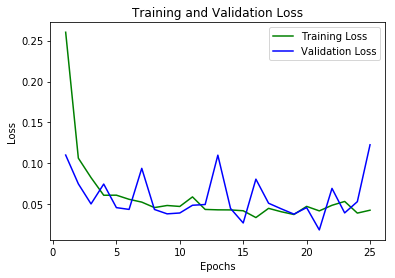

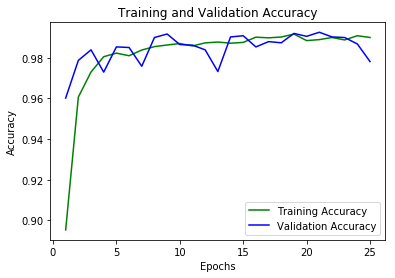

In [17]:
plot_loss_acc(history, 25)

In [12]:
test_generator.reset()
pred = model.predict_generator(test_generator, steps = 46)
print(pred.shape)

/usr/local/lib/python3.5/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


(1472, 1)


In [13]:
print(pred)
print(test_generator.classes)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
[0 0 0 ... 1 1 1]


In [14]:
classes = np.around(pred)

In [15]:
print(confusion_matrix(test_generator.classes, classes))

[[ 365    3]
 [  22 1082]]


In [16]:
prin_report(test_generator.classes, classes)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       368
           1       1.00      0.98      0.99      1104

    accuracy                           0.98      1472
   macro avg       0.97      0.99      0.98      1472
weighted avg       0.98      0.98      0.98      1472



In [28]:
model.evaluate_generator(test_generator, steps = 46)

/usr/local/lib/python3.5/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


[0.4044262128126856, 0.9748641304347826]

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

In [38]:
visualize_layer(model, layer2)

KeyError: <keras.layers.convolutional.Conv2D object at 0x7f6962d9def0>

In [ ]:
from keras import backend as K

# K.learning_phase() is a flag that indicates if the network is in training or
# predict phase. It allow layer (e.g. Dropout) to only be applied during training
inputs = [K.learning_phase()] + model.inputs

_convout1_f = K.function(inputs, [convout1.output])
def convout1_f(X):
    # The [0] is to disable the training phase flag
    return _convout1_f([0] + [X])

# utility functions
from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    pl.colorbar(im, cax=cax)
    
    

import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[2]
    print(nimgs)
    imshape = imgs.shape[:2]
    print(imshape)
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in range(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[:, :,i]
    return mosaic